In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
MNIST = sio.loadmat('mnist.mat')

In [3]:
train_data = MNIST['train_data'].astype(np.float32)
train_target = MNIST['train_target']
test_data = MNIST['test_data'].astype(np.float32)
test_target = MNIST['test_target']
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(200, 784)
(1, 200)
(200, 784)
(1, 200)


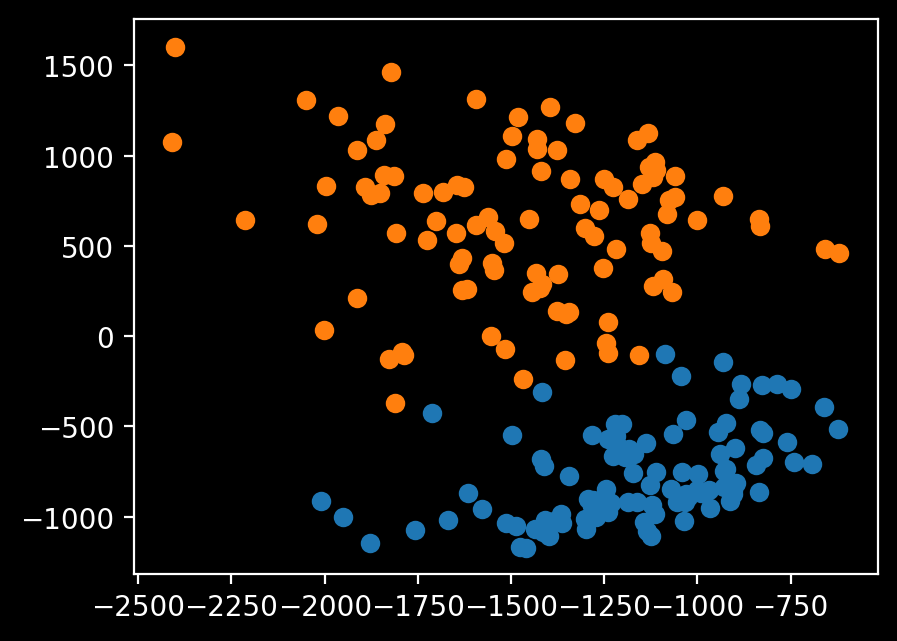

In [42]:
u,s,vh = np.linalg.svd(train_data,full_matrices=False)
pc = train_data@vh[:2,:].T
z = pc
plt.scatter(z[:100 ,0], z[:100 ,1])
plt.scatter(z[100: ,0], z[100: ,1])
# plt.savefig ( ’ so2 . pdf ’)

In [45]:
w = np.linalg.inv(z.T@z)@z.T@train_target[0]
y_pred = ((z@w) >= 0).astype(np.int32)
y_pred[y_pred <= 0] = -1
acc_train = (y_pred == train_target[0]).mean()
print("training accuracy:", acc_train)
z_test = vh[:2, :] @ test_data.T
z_test = z_test.T
y_pred_test = ((z_test@w) >= 0).astype(np.int32)
y_pred_test[y_pred_test <= 0] = -1
acc_test = (y_pred_test == test_target[0]).mean()
print("testing accuracy:",acc_test)

training accuracy: 0.975
testing accuracy: 0.985


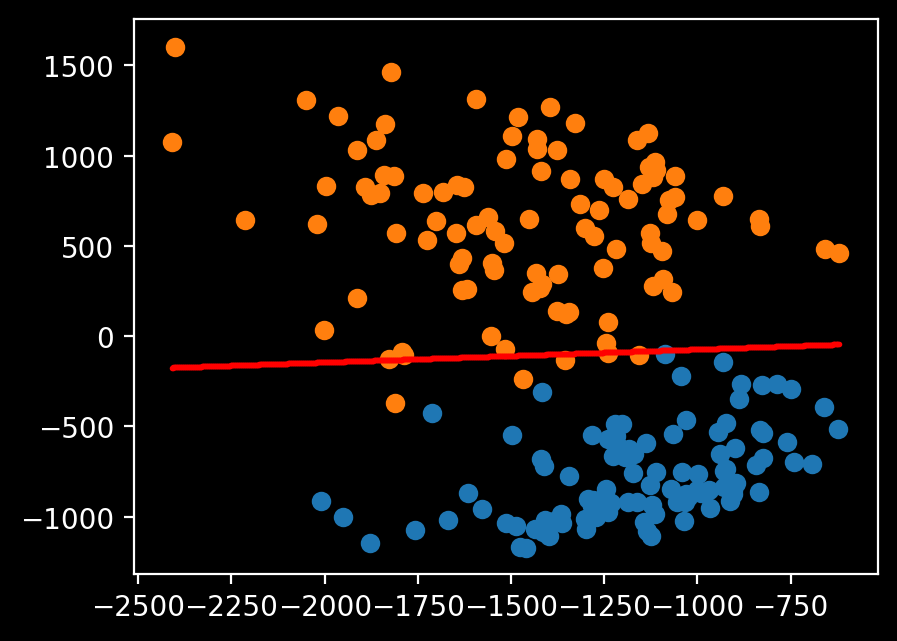

In [48]:
point_num = 1000
zmin = z.min(axis = 0)
zmax= z.max(axis = 0)
point_x = (np.arange(point_num).astype(np.float32) /
point_num * (zmax[0] - zmin[0]) + zmin[0])
point_y = -1 * point_x * w[0] / w[1]
idx = np.logical_and(point_y < zmax[1], point_y >= zmin[1])
plt.scatter(z[:100,0],z[:100,1])
plt.scatter(z[100:,0],z[100:,1])
plt.scatter(point_x[idx],point_y[idx], s = 1, color= 'red')
# plt.savefig(’so4.pdf’)